SyriaTel Customer Churn

Introduction
Churn is the percentage of customers that stop doing business with a company during a given time frame.
In this project we are building a classification model to predict whether a customer will stop transacting with Syriatel, which is mobile network provider. We will use machine learning algorithms to build a classifier suited for the best predictions of why customers opt out of business with  the above service provider. 
 
Business understanding
There were 8,500,000 Internet users in Syria as of March 2021 for a 46.5% Internet penetration rate. The growth of Internet users has been rapid since 2016,making the telcom market competitive. The SyriaTelcom therefore need to devise for ways to ratain customers, win more customer and increase their sales revenue.The Churn in Telecom’s dataset is obtained from Kaggle and contains information on customers that have left and those who are still transacting using syriatel.

Stake holders
This data is important to: 
*The Syriatel Mobile Telecom company
*Shareholders
*Employees
*Customers


Business problem
To find out reasons or factors leading to customer churning from the telcom company and provide recommendations on major factors to address which highly contribute to the customer churn.


Objectives
*To identify the major factors that determine if a customer is likely to churn.
*To determine the model that is most effective in predicting Customer Churn.
*To identify customer retention strategies.

Data Preparation.
We import the relevant libraries to be used for the project.

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression


Checking the first rows of the data

In [190]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Data Exploration

In [191]:
#Dimensions of dataset
df.shape


(3333, 21)

The data has 3333 rows and 21 columns.

In [192]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Colums names and what they indicate in the data:

state: The state where the customer resides.
account length: Duration of the customer's account.
area code: Area code of the customer.
phone number: The customer's phone number.
international plan: Whether the customer has an international plan.
voice mail plan: Whether the customer has a voice mail plan.
number vmail messages: Number of voice mail messages.
total day minutes: Total minutes of calls during the day.
total day calls: Total number of calls during the day.
total day charge: Total charge for day calls.
total eve minutes: Total minutes of calls during the evening.
total eve calls: Total number of calls during the evening.
total eve charge: Total charge for evening calls.
total night minutes: Total minutes of calls during the night.
total night calls: Total number of calls during the night.
total night charge: Total charge for night calls.
total intl minutes: Total minutes of international calls.
total intl calls: Total number of international calls.
total intl charge: Total charge for international calls.
customer service calls: Number of calls to customer service.
churn: Whether the customer has churned (True/False).



Clearing the empty spaces in columns

In [193]:
df.columns = df.columns.str.replace(' ', '_')

In [194]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Cheking for description of the data in the DataFrame

In [195]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Checking for information about the DataFrame

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [197]:
df.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

Data cleaning

In [198]:
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [199]:
df.duplicated().sum()

0

In [200]:
df.drop(columns=['phone_number'], inplace=True)

In [201]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Types of Data variables

In [202]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 3 categorical variables

The categorical variables are : ['state', 'international_plan', 'voice_mail_plan']


In [203]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [204]:
df.skew(numeric_only=True)

account_length            0.096606
area_code                 1.126823
number_vmail_messages     1.264824
total_day_minutes        -0.029077
total_day_calls          -0.111787
total_day_charge         -0.029083
total_eve_minutes        -0.023877
total_eve_calls          -0.055563
total_eve_charge         -0.023858
total_night_minutes       0.008921
total_night_calls         0.032500
total_night_charge        0.008886
total_intl_minutes       -0.245136
total_intl_calls          1.321478
total_intl_charge        -0.245287
customer_service_calls    1.091359
churn                     2.018356
dtype: float64

In [205]:
corr_matrix = df.corr()
corr_matrix

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number_vmail_messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


Data visualizations

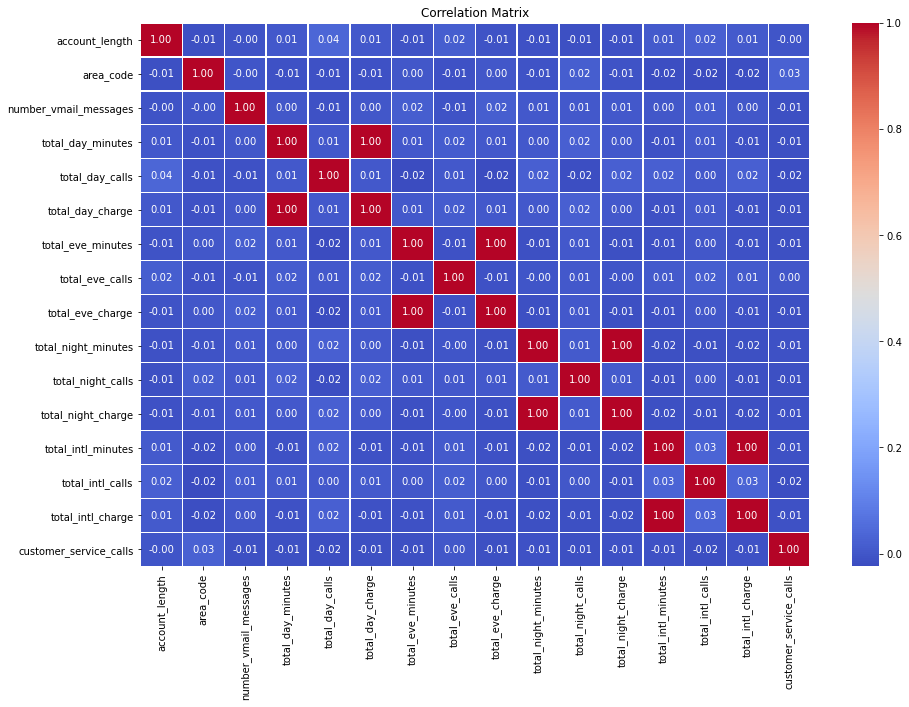

In [ ]:
#Checking for correlation
df = pd.DataFrame(df)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


There is high co-rellation between account_length and total eve minutes,and total international charge.
Customers who have stayed in the company for long are more likely to make more evening calls.

Feature Distribution


Numerical features distribution

c:\anaconda\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

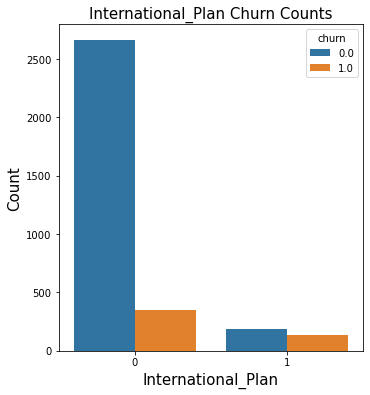

In [209]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(X['international_plan'], hue=y)
plt.title('International_Plan Churn Counts', fontsize=15)
plt.xlabel('International_Plan', fontsize=15)
plt.ylabel('Count', fontsize=15)


Customers with an international_plan are less likely to churn Syriatel.

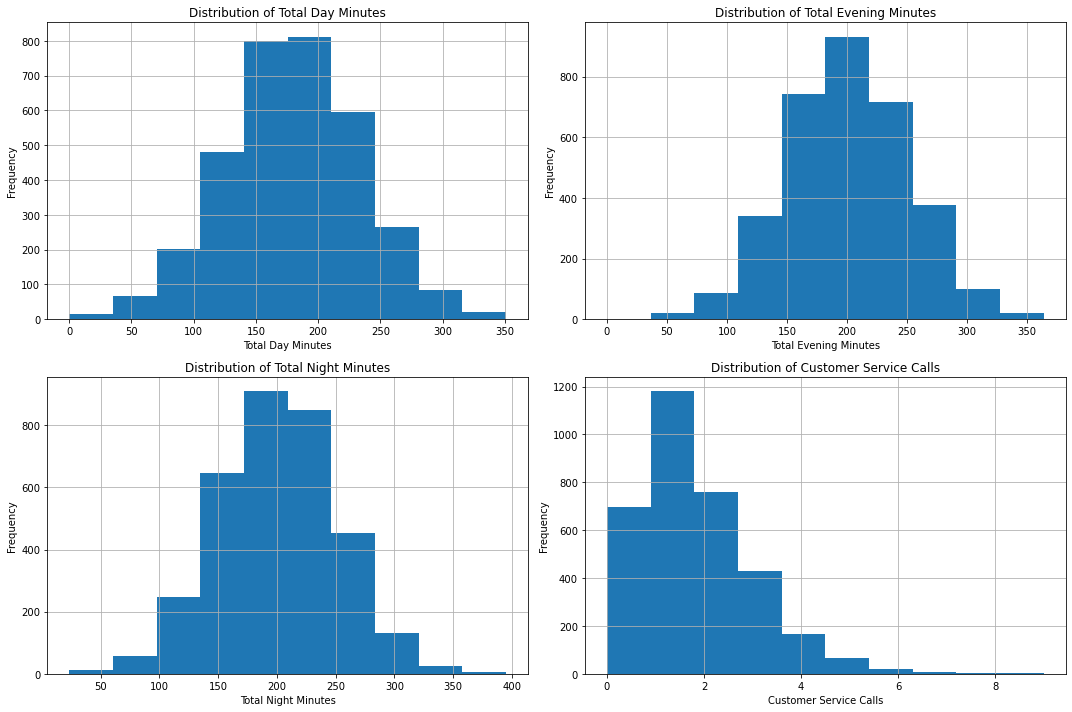

In [ ]:
plt.figure(figsize=(15, 10))

# Subplot 1: Distribution of 'total_day_minutes'
plt.subplot(2, 2, 1)
fig1 = df["total_day_minutes"].hist(bins=10)
fig1.set_xlabel('Total Day Minutes')
fig1.set_ylabel('Frequency')
fig1.set_title('Distribution of Total Day Minutes')

# Subplot 2: Distribution of 'total_eve_minutes'
plt.subplot(2, 2, 2)
fig2 = df["total_eve_minutes"].hist(bins=10)
fig2.set_xlabel('Total Evening Minutes')
fig2.set_ylabel('Frequency')
fig2.set_title('Distribution of Total Evening Minutes')

# Subplot 3: Distribution of 'total_night_minutes'
plt.subplot(2, 2, 3)
fig3 = df["total_night_minutes"].hist(bins=10)
fig3.set_xlabel('Total Night Minutes')
fig3.set_ylabel('Frequency')
fig3.set_title('Distribution of Total Night Minutes')

# Subplot 4: Distribution of 'customer_service_calls'
plt.subplot(2, 2, 4)
fig4 = df["customer_service_calls"].hist(bins=10)
fig4.set_xlabel('Customer Service Calls')
fig4.set_ylabel('Frequency')
fig4.set_title('Distribution of Customer Service Calls')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
findings
We have more customers communicating during the day compared to night.
Customer service calls seem to be skewed and the above variables have a normal distribution.

Describing numerical variables

In [ ]:
df[numerical].describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'area_code'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>],
       [<AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>],
       [<AxesSubplot:title={'center':'total_eve_charge'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>],
       [<AxesSubplot:title={'center':'total_intl_minutes'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>,
        <AxesSubplot:title={'center':'customer_service_calls'}>]],
      dtype=object)

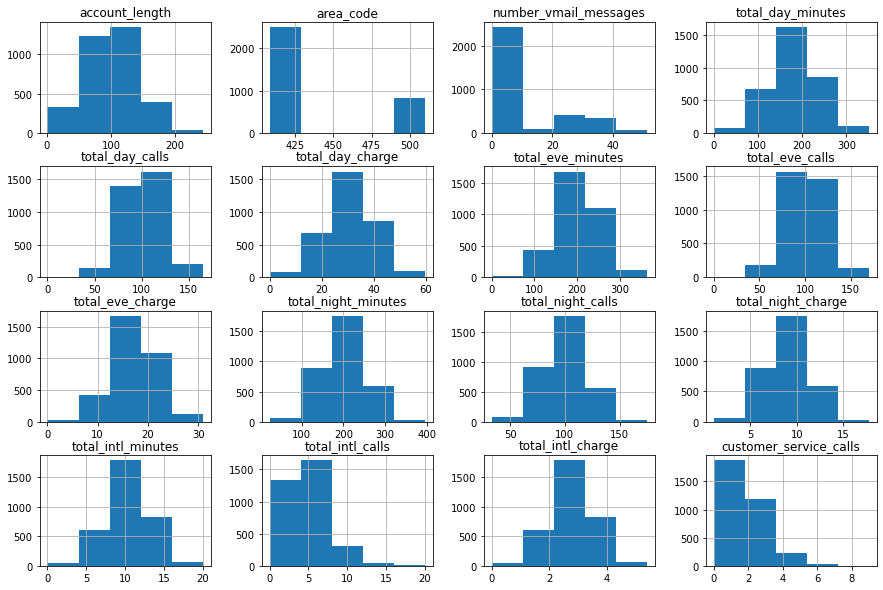

In [ ]:
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=5, figsize=(15, 10))

Night calls and international calls are skewed meaning customers are more likely to make calls at a particular time.Evening charges are more compared to day charges.

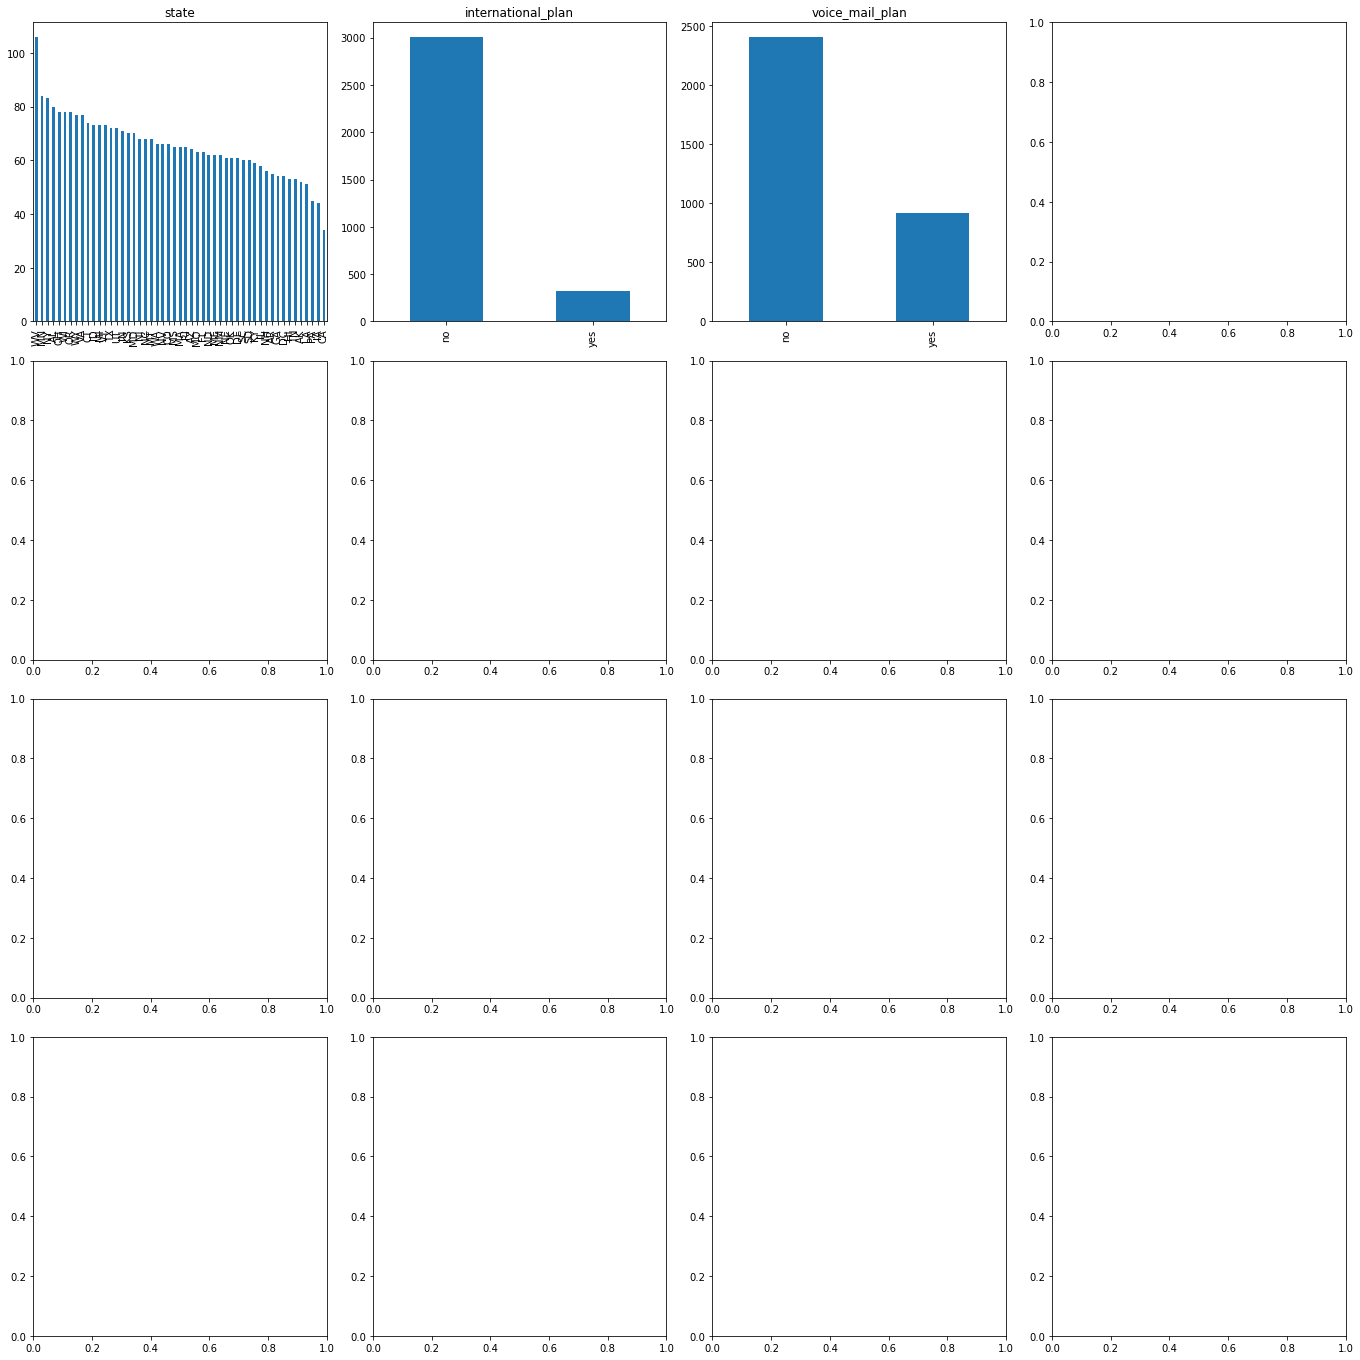

In [ ]:
categorical = ['state', 'international_plan', 'voice_mail_plan']  # Replace with your actual categorical columns

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(19, 19))  # Create a 4x4 grid of subplots
ax = ax.flatten()  # Flatten the 2D array of axes into a 1D array for easy indexing

for i, cat in enumerate(categorical):
    df[cat].value_counts().plot(kind='bar', ax=ax[i]).set_title(cat)

plt.tight_layout()
plt.show()


Customers with a voice mail plan are less likely to churn.

Text(0.5, 1.0, 'Churned')

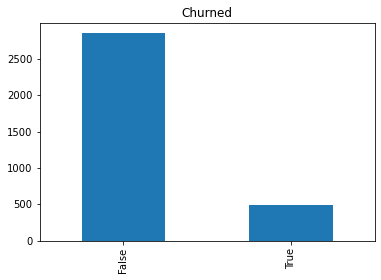

In [ ]:
df['churn'].value_counts().plot(kind='bar').set_title("Churned")

The customers who have churned are less compared to the total number of customers.

Detecting out liers

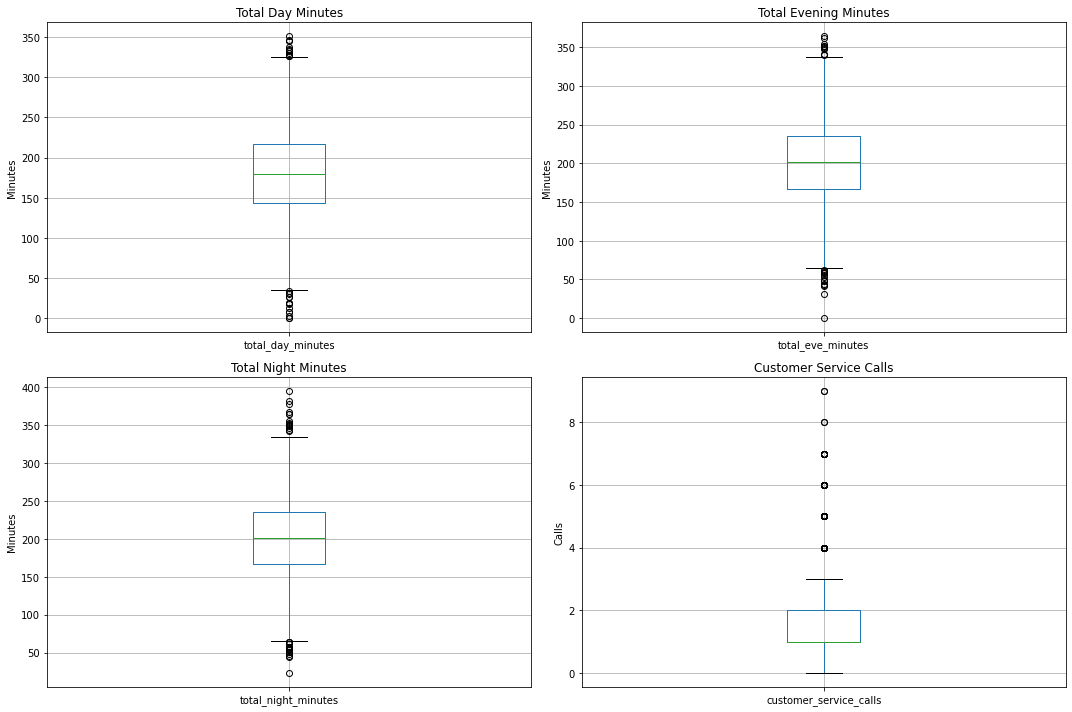

In [ ]:
plt.figure(figsize=(15, 10))

# Subplot 1: Box plot for 'total_day_minutes'
plt.subplot(2, 2, 1)
fig1 = df.boxplot(column='total_day_minutes')
fig1.set_title('Total Day Minutes')
fig1.set_ylabel('Minutes')

# Subplot 2: Box plot for 'total_eve_minutes'
plt.subplot(2, 2, 2)
fig2 = df.boxplot(column='total_eve_minutes')
fig2.set_title('Total Evening Minutes')
fig2.set_ylabel('Minutes')

# Subplot 3: Box plot for 'total_night_minutes'
plt.subplot(2, 2, 3)
fig3 = df.boxplot(column='total_night_minutes')
fig3.set_title('Total Night Minutes')
fig3.set_ylabel('Minutes')

# Subplot 4: Box plot for 'customer_service_calls'
plt.subplot(2, 2, 4)
fig4 = df.boxplot(column='customer_service_calls')
fig4.set_title('Customer Service Calls')
fig4.set_ylabel('Calls')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Handling the outliers

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply the function to the columns
df_cleaned = df.copy()
columns_to_check = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'customer_service_calls']
for column in columns_to_check:
    df_cleaned = remove_outliers(df_cleaned, column)

One Hot Encoding
This is a technique used to convert categorical variables into a set of binary features. This is done by creating a new feature for each category, and then assigning a value of 1 to the feature if the category is present and 0 if it is not.

In [ ]:
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)
df.replace('no', 0, inplace=True)
df.replace('yes', 1, inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['state'], drop_first=True)
df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,...,0,0,0,0,0,0,0,0,0,0


Feature scaling

Separate column features and target variable

In [ ]:
Scaler =  StandardScaler()
X = df.drop(columns=['churn'])  
y = df['churn']  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((2666, 68), (667, 68))

Creating models

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1] 

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8425787106446777
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       579
         1.0       0.35      0.23      0.28        88

    accuracy                           0.84       667
   macro avg       0.62      0.58      0.59       667
weighted avg       0.82      0.84      0.83       667

ROC AUC Score: 0.7903517035641389


Interpretation

Accuracy:
The accuracy means that 84.26% of the predictions made by the model are correct. However, accuracy alone can be misleading, especially with imbalanced data, where one class is much more prevalent than the other.

Classification Report:
The classification report provides precision, recall, and F1-score for each class.

Class 0.0 (Non-Churn)

Precision: 0.89: Out of all the instances predicted as class 0 (non-churn), 89% are actually non-churn. This indicates that most of the predictions for non-churn are correct.
Recall: 0.94: Out of all the actual class 0 instances, 94% are correctly predicted as non-churn. This shows that the model is very good at identifying non-churn cases.
F1-Score: 0.91: The F1-score, which is the harmonic mean of precision and recall, is high, indicating a strong balance between precision and recall for class 0.

Class 1.0 (Churn)

Precision: 0.35: Out of all the instances predicted as class 1 (churn), only 35% are actually churn. This indicates that many of the churn predictions are false positives.
Recall: 0.23: Out of all the actual class 1 instances, only 23% are correctly predicted as churn. This suggests that the model is missing a significant number of true churn cases (false negatives).
F1-Score: 0.28: The low F1-score indicates that the model struggles to balance precision and recall for the churn class.
ROC AUC Score
ROC AUC Score: 0.7904
The ROC AUC score is 0.79, which indicates that the model has a good ability to distinguish between the positive (churn) and negative (non-churn) classes. A score closer to 1 indicates better performance. However, given the low recall and precision for the churn class, the model might not be performing well enough on the minority class despite this ROC AUC score.

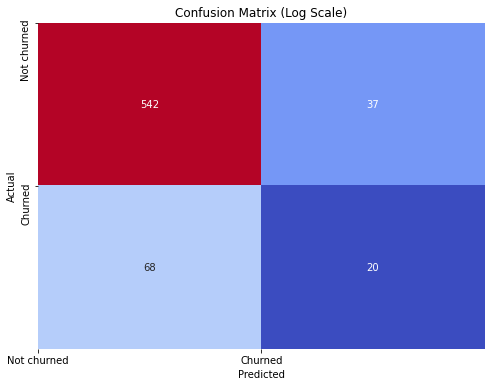

In [226]:
cm_log = np.log1p(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=cm, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix (Log Scale)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not churned', 'Churned'])
plt.yticks([0, 1], ['Not churned', 'Churned'])
plt.show()

False Positives: The number of class 0 (non-churn) instances incorrectly predicted as class 1 (churn).
False Negatives: The number of class 1 (churn) instances incorrectly predicted as class 0 (non-churn).

Using Decision tree classifier

Accuracy: 0.8245877061469266
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89       579
         1.0       0.41      0.74      0.53        88

    accuracy                           0.82       667
   macro avg       0.68      0.79      0.71       667
weighted avg       0.88      0.82      0.84       667

ROC AUC Score: 0.8758635578583766


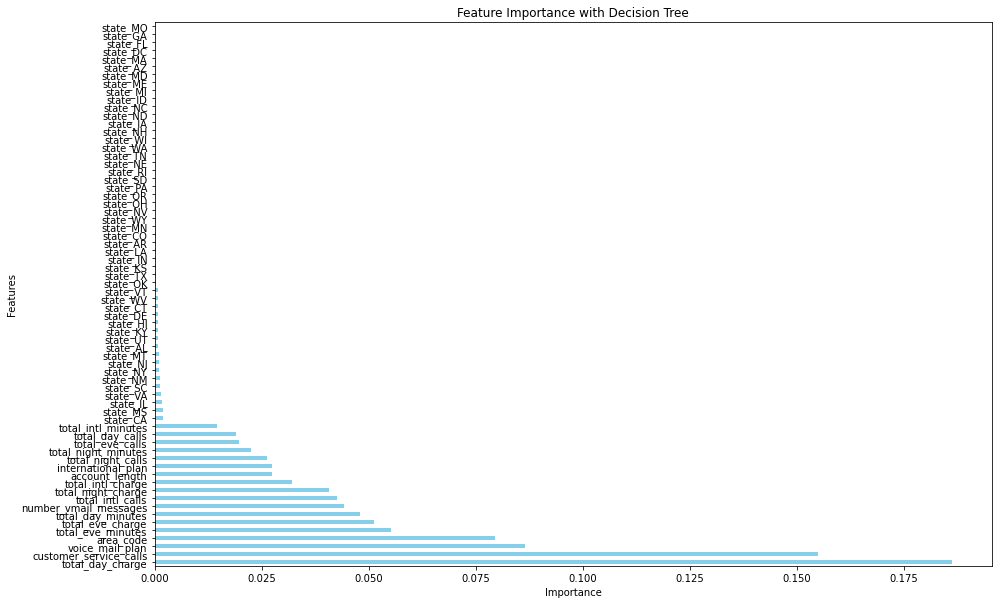

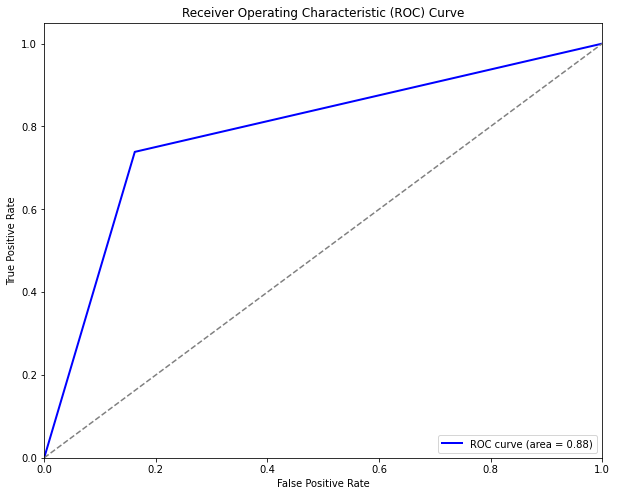

In [233]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"ROC AUC Score: {roc_auc}")

# Determine and plot feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(15, 10))
feature_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance with Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random performance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#An ROC of 0.8759 suggests that the model is quite good for distinguishing between churn and non-churn customers.

RandomForestClassifier
Evaluation using the most important features

Accuracy: 0.9025487256371814
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       579
         1.0       0.63      0.62      0.63        88

    accuracy                           0.90       667
   macro avg       0.79      0.78      0.79       667
weighted avg       0.90      0.90      0.90       667

ROC AUC Score: 0.8758635578583766


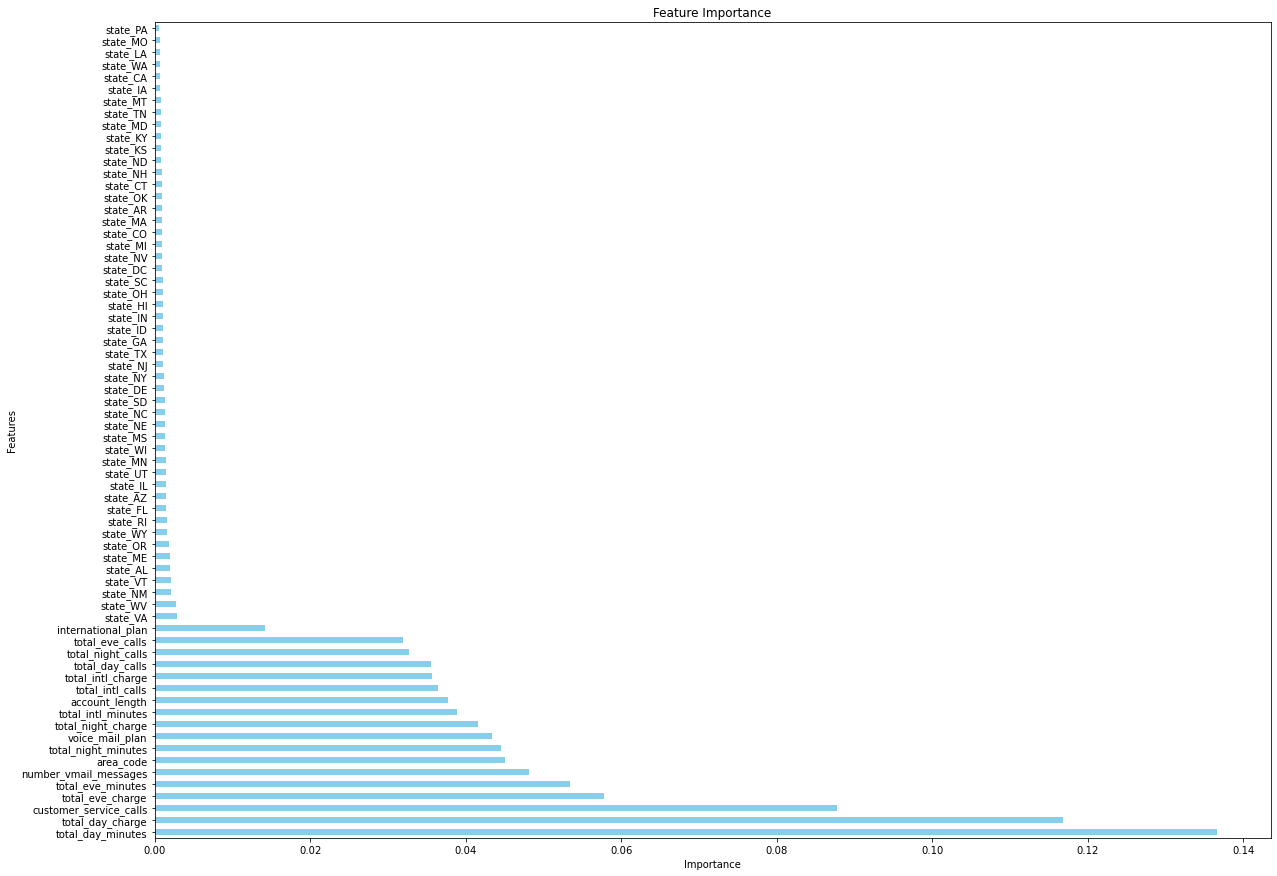

In [234]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"ROC AUC Score: {roc_auc}")

# Determine feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
feature_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

ROC Curve

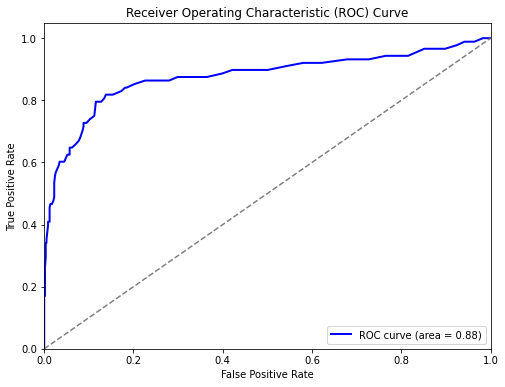

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#An ROC of 0.8759 suggests that the model is quite good for distinguishing between churn and non-churn customers.

Interpretation
Accuracy: 0.9025 (90.25%)
This means that 90.25% of the predictions made by the model are correct.
Class 0.0 (Non-Churn)

Precision: 0.94: Of all the instances predicted as non-churn, 94% were correct. This indicates a low rate of false positives (non-churn predicted as churn).
Recall: 0.94: Of all the actual non-churn instances, 94% were correctly identified as non-churn. This shows the model is very effective at identifying non-churn customers, with a low rate of false negatives.
F1-Score: 0.94: The F1-score, which balances precision and recall, is very high. This confirms strong performance in predicting the majority class (non-churn).

Class 1.0 (Churn)
Precision: 0.63: Of all instances predicted as churn, 63% were correct. This suggests a moderate rate of false positives (non-churn customers incorrectly predicted as churn).
Recall: 0.62: Of all actual churn instances, 62% were correctly identified. This indicates that the model is fairly effective at detecting churners, but there are still some churners being missed (false negatives).
F1-Score: 0.63: The F1-score for churn is lower, reflecting a balance between moderate precision and recall.

 Conclusion

Customers are more likely due to high day time charges, expensive international calls, inefficient customer services  and 
The Random Forest Classifier is a better model with an accuracy score of 90.25%

Recommendations

*We recomend SyriaTel to reduce on the day charges as most customers call for longer hours during the day, which may have contributed to more churns.

*Reduce also on the international charges to encourage customers to make frequent calls as internatinal calls tend to be more expensive hence customers make calls when necessary.

*Intergrate technology and come up with online solutions to reduce on customer service calls.

*Rampant campaigns and promotions to win back churned customers.